# Business Context

A bank **(Thera Bank)** has identified an opportunity to grow its business by converting existing liability customers into **personal loan customers**. This strategy follows a successful campaign from the previous year, which demonstrated a promising conversion rate. Encouraged by these results, the retail marketing department is motivated to develop more refined and targeted campaigns.

# Problem Statement

The primary challenge for Thera Bank is to enhance the conversion rate of liability customers to personal loan customers through targeted marketing campaigns. This initiative aims to build upon the previous year's success, which saw a healthy conversion rate of over 9%. The objective is to achieve a higher success ratio in converting customers to personal loan customers, doing so within the constraints of a minimal budget.

# Dataset

The dataset have 5000 row and 14 columns, each rows represent the customer and personal Loan is target column. Other features are:

1. id : Customer ID
2. age : Customer's age
3. experience : years of professional experience
4. income : Annual income of the customer
5. zip_code : Home Address ZIP code
6. family : Family size of the customer
7. ccavg : Avg. spending on credit cards per month
8. education : Education Level. 1 Undergraduate /2 Graduate /3 (Advanced/Professional)
9. mortgage : Value of house mortgage if any
10. personal_loan : Did this customer accept the personal loan offered in the last campaign?
11. securities_account : Does the customer have a securities account with the bank?
12. cd_account : Does the customer have a certificate of deposit (CD) account with the bank?
13. online : Does the customer use internet banking facilities?
14. creditcard : Does the customer uses a credit card issued by UniversalBank?

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np

import zipcodes as zcode

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_curve, auc


from sklearn.model_selection import StratifiedKFold, cross_validate
from imblearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# 2. Dataset reading

In [2]:
# Importing dataset
bank_loan = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
# Displaying top 5 rows of the dataset
bank_loan.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [4]:
# Shape of the data
bank_loan.shape

(5000, 14)

# 3. EDA

In [5]:
# Checking the null values and datatype of the columns
bank_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
# Statistics of the dataset
bank_loan.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [7]:
# Unique values of the features
bank_loan.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [8]:
for column in bank_loan.columns:
    unique_values = bank_loan[column].unique()
    sorted_unique_values = np.sort(unique_values)
    print(f"Unique values in '{column}':")
    print(f'{sorted_unique_values}')
    print('')

Unique values in 'ID':
[   1    2    3 ... 4998 4999 5000]

Unique values in 'Age':
[23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67]

Unique values in 'Experience':
[-3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]

Unique values in 'Income':
[  8   9  10  11  12  13  14  15  18  19  20  21  22  23  24  25  28  29
  30  31  32  33  34  35  38  39  40  41  42  43  44  45  48  49  50  51
  52  53  54  55  58  59  60  61  62  63  64  65  68  69  70  71  72  73
  74  75  78  79  80  81  82  83  84  85  88  89  90  91  92  93  94  95
  98  99 100 101 102 103 104 105 108 109 110 111 112 113 114 115 118 119
 120 121 122 123 124 125 128 129 130 131 132 133 134 135 138 139 140 141
 142 143 144 145 148 149 150 151 152 153 154 155 158 159 160 161 162 163
 164 165 168 169 170 171 172 173 174 175 178 179 180 181 182 18

In [9]:
# Id column is not needed need to drop it
bank_loan.drop(['ID'], axis=1, inplace=True)

#### Summary
1. The dataset have not any null values
2. All the column have data type integer except the CCAvg column have float64.  
3. Family and education columns seems categorical 
4. Personal Loan, Securities Account, CD Account, Online, CreditCard, has 0 or 1 value.
5. The column Experience has negative values
6. ZIP code has one value which is 4 digit but all others are in 5 digit 


Zipcode, Family, Education, Securities Account, CD_account, online, Credit card are all categorical variables.

## 1. Univariant Analysis

### 1. Age

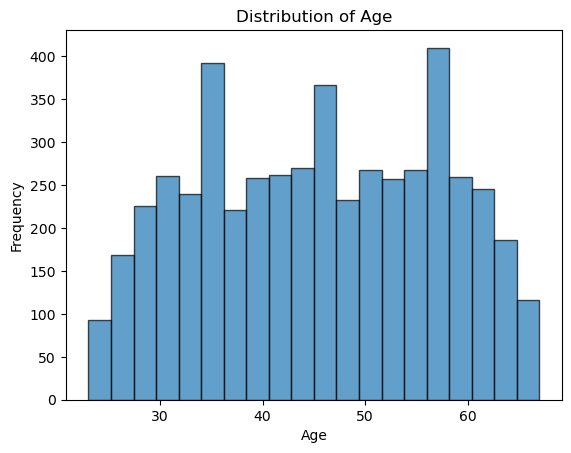

In [10]:
plt.hist(bank_loan['Age'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### 2. Experience

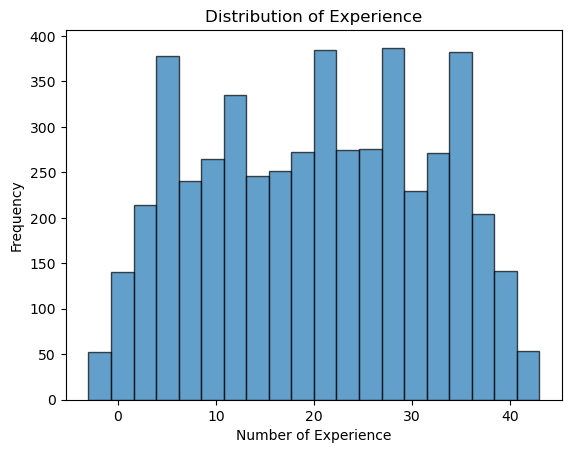

In [11]:
plt.hist(bank_loan['Experience'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Experience')
plt.xlabel('Number of Experience')
plt.ylabel('Frequency')
plt.show()

### 3. Income

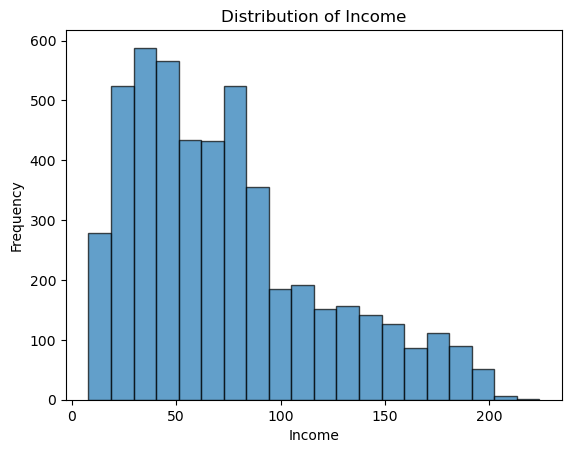

In [12]:
plt.hist(bank_loan['Income'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

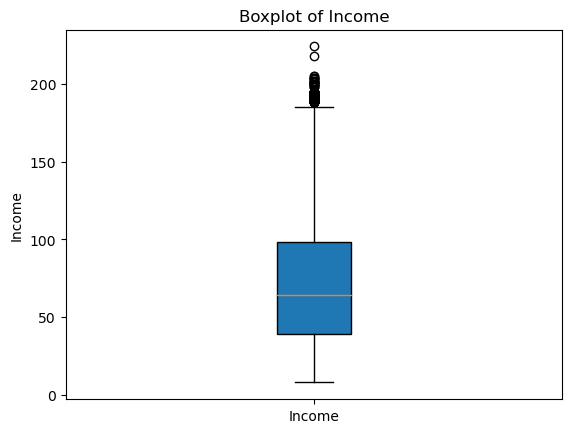

In [13]:
# Creating a boxplot for the 'Mortgae' column
plt.boxplot(bank_loan['Income'], vert=True, patch_artist=True)

# Adding title and labels
plt.title('Boxplot of Income')
plt.ylabel('Income')

# Customize x-axis labels if needed
plt.xticks([1], ['Income'])  # [1] because it's a single boxplot

# Showing the plot
plt.show()

###### There are some outliers in the Income

### 4. ZIP Code

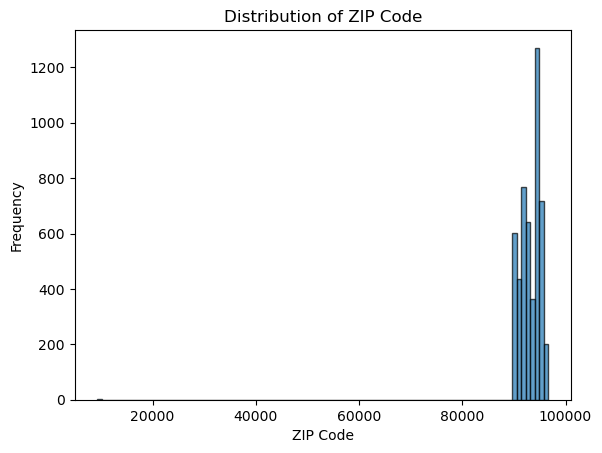

In [14]:
plt.hist(bank_loan['ZIP Code'], bins=100, edgecolor='k', alpha=0.7)
plt.title('Distribution of ZIP Code')
plt.xlabel('ZIP Code')
plt.ylabel('Frequency')
plt.show()

### 5. Family

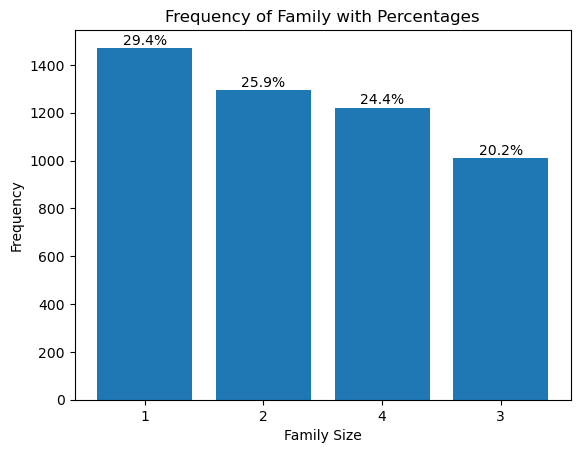

In [15]:
Family_counts = bank_loan['Family'].value_counts()

# Calculating percentages
total = Family_counts.sum()
percentages = (Family_counts / total) * 100

# Creating the bar chart
bars = plt.bar(Family_counts.index.astype(str), Family_counts.values)

# Adding percentage labels on top of each bar
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{percentage:.1f}%', ha='center', va='bottom')

# Adding title and labels
plt.title('Frequency of Family with Percentages')
plt.xlabel('Family Size')
plt.ylabel('Frequency')

# Showing the plot
plt.show()

### 6. CCAvg

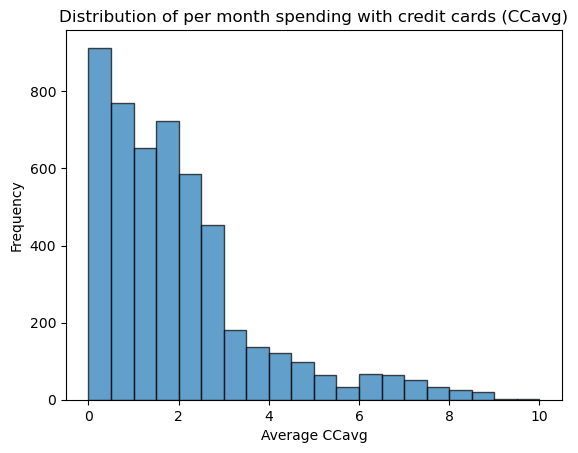

In [16]:
plt.hist(bank_loan['CCAvg'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of per month spending with credit cards (CCavg)')
plt.xlabel('Average CCavg')
plt.ylabel('Frequency')
plt.show()

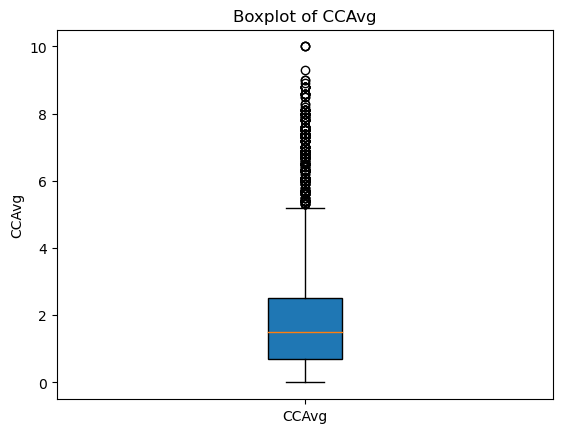

In [17]:
# Creating a boxplot for the 'Mortgae' column
plt.boxplot(bank_loan['CCAvg'], vert=True, patch_artist=True)

# Adding title and labels
plt.title('Boxplot of CCAvg')
plt.ylabel('CCAvg')

# Customize x-axis labels if needed
plt.xticks([1], ['CCAvg'])  # [1] because it's a single boxplot

# Showing the plot
plt.show()

###### There are some outliers in the CCAvg

### 7. Education

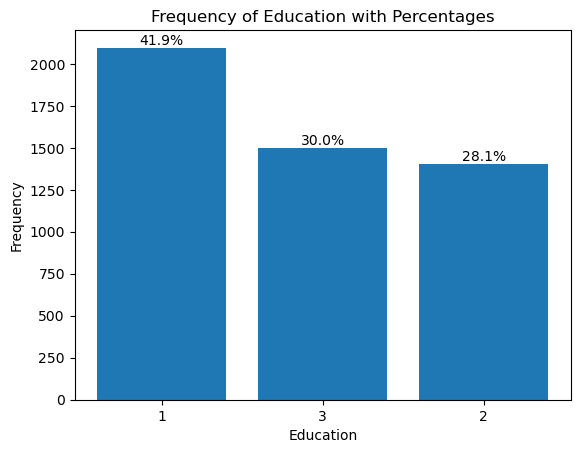

In [18]:
Education_counts = bank_loan['Education'].value_counts()

# Calculating percentages
total = Education_counts.sum()
percentages = (Education_counts / total) * 100

# Creating the bar chart
bars = plt.bar(Education_counts.index.astype(str), Education_counts.values)

# Adding percentage labels on top of each bar
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{percentage:.1f}%', ha='center', va='bottom')

# Adding title and labels
plt.title('Frequency of Education with Percentages')
plt.xlabel('Education')
plt.ylabel('Frequency')

# Showing the plot
plt.show()

### 8. Mortgage

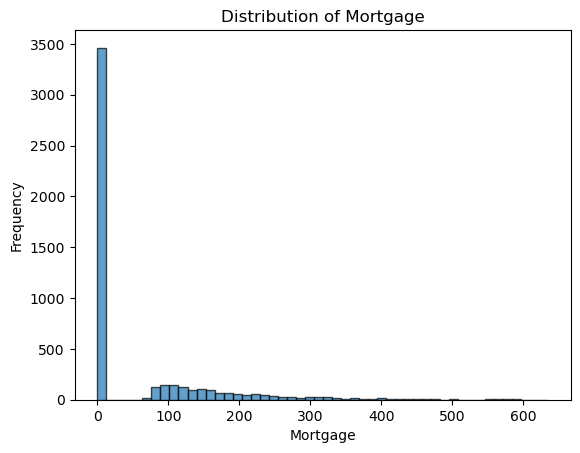

In [19]:
plt.hist(bank_loan['Mortgage'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Mortgage')
plt.xlabel('Mortgage')
plt.ylabel('Frequency')
plt.show()

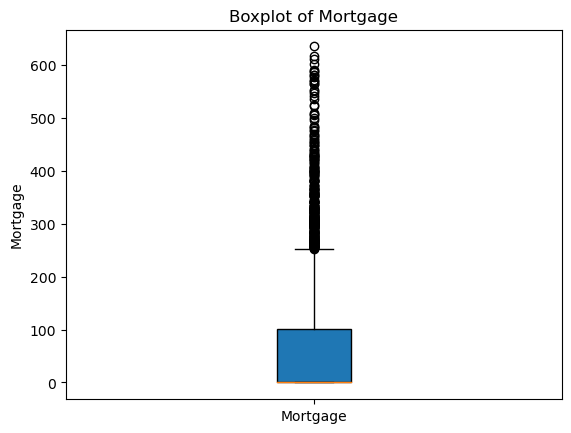

In [20]:
# Creating a boxplot for the 'Mortgae' column
plt.boxplot(bank_loan['Mortgage'], vert=True, patch_artist=True)

# Adding title and labels
plt.title('Boxplot of Mortgage')
plt.ylabel('Mortgage')

# Customize x-axis labels if needed
plt.xticks([1], ['Mortgage'])  # [1] because it's a single boxplot

# Showing the plot
plt.show()

### 9. Securities Account

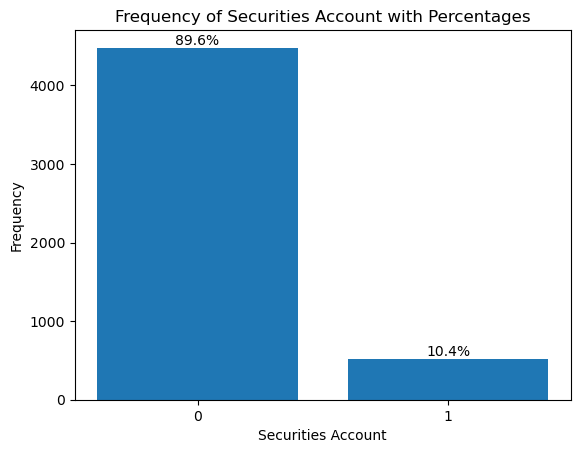

In [21]:
Securities_counts = bank_loan['Securities Account'].value_counts()

# Bar chart
bars = plt.bar(Securities_counts.index.astype(str), Securities_counts.values)  # Converting index to string for clarity

# Calculating percentages
total = Securities_counts.sum()
percentages = (Securities_counts / total) * 100

# Adding percentage labels and value labels on top of each bar
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{percentage:.1f}%', ha='center', va='bottom')
    
# Adding title and labels
plt.title('Frequency of Securities Account with Percentages')
plt.xlabel('Securities Account')
plt.ylabel('Frequency')

# Showing the plot
plt.show()

### 10. CD Account

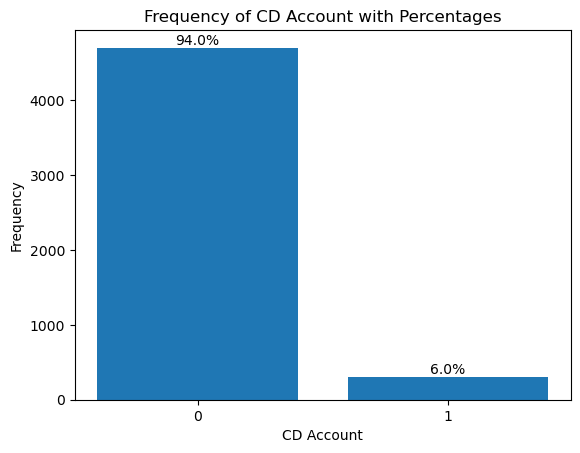

In [22]:
Account_counts = bank_loan['CD Account'].value_counts()

# Bar chart
bars = plt.bar(Account_counts.index.astype(str), Account_counts.values)  # Converting index to string for clarity

# Calculating percentages
total = Account_counts.sum()
percentages = (Account_counts / total) * 100

# Adding percentage labels and value labels on top of each bar
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{percentage:.1f}%', ha='center', va='bottom')
    
# Adding title and labels
plt.title('Frequency of CD Account with Percentages')
plt.xlabel('CD Account')
plt.ylabel('Frequency')

# Showing the plot
plt.show()

### 11. Online

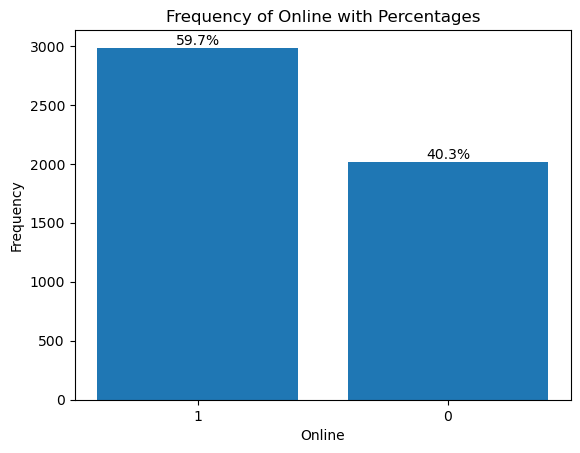

In [23]:
Online_counts = bank_loan['Online'].value_counts()

# Bar chart
bars = plt.bar(Online_counts.index.astype(str), Online_counts.values)  # Converting index to string for clarity

# Calculating percentages
total = Online_counts.sum()
percentages = (Online_counts / total) * 100

# Adding percentage labels and value labels on top of each bar
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{percentage:.1f}%', ha='center', va='bottom')
    
# Adding title and labels
plt.title('Frequency of Online with Percentages')
plt.xlabel('Online')
plt.ylabel('Frequency')

# Showing the plot
plt.show()

### 12. CreditCard

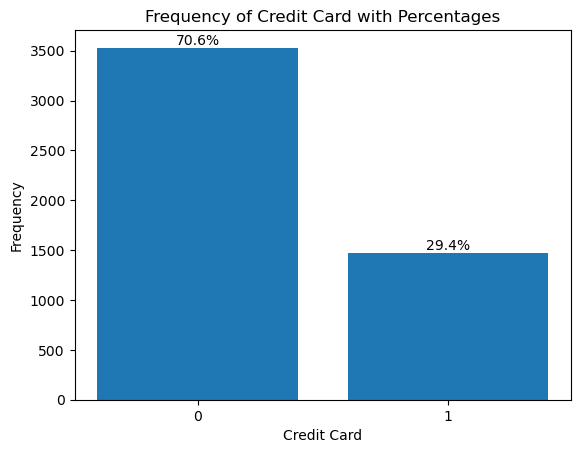

In [24]:
CreditCard_counts = bank_loan['CreditCard'].value_counts()

# Bar chart
bars = plt.bar(CreditCard_counts.index.astype(str), CreditCard_counts.values)  # Converting index to string for clarity

# Calculating percentages
total = CreditCard_counts.sum()
percentages = (CreditCard_counts / total) * 100

# Adding percentage labels and value labels on top of each bar
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{percentage:.1f}%', ha='center', va='bottom')
    
# Adding title and labels
plt.title('Frequency of Credit Card with Percentages')
plt.xlabel('Credit Card')
plt.ylabel('Frequency')

# Showing the plot
plt.show()

### 13. Personal Loan

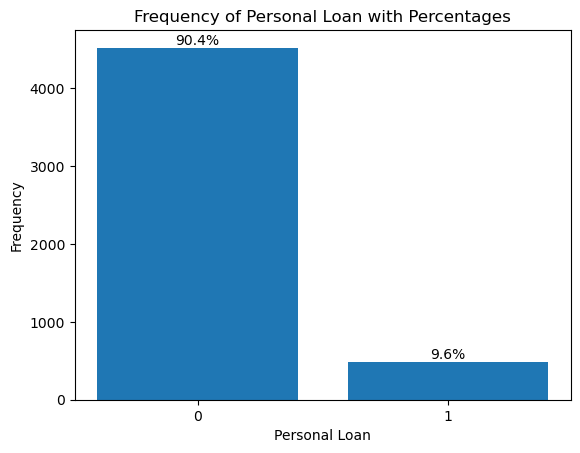

In [25]:
Personal_loan_counts = bank_loan['Personal Loan'].value_counts()

# Bar chart
bars = plt.bar(Personal_loan_counts.index.astype(str), Personal_loan_counts.values)  # Converting index to string for clarity

# Calculating percentages
total = Personal_loan_counts.sum()
percentages = (Personal_loan_counts / total) * 100

# Adding percentage labels and value labels on top of each bar
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{percentage:.1f}%', ha='center', va='bottom')
    
# Adding title and labels
plt.title('Frequency of Personal Loan with Percentages')
plt.xlabel('Personal Loan')
plt.ylabel('Frequency')

# Showing the plot
plt.show()

#### Summary
1. The mean age of customers is 45 and std is 11, the age is well distributed, and majority of customers lies between 30 and 60
2. The mean experience of customers is 20 and std is 11, the experience is well distributed, also there is negative values are in this columns
3. The mean income of customer is 73 and std is 46, the data is right skewed, more customers has income between 30k and 80k
4. There is one an outliers in the Zip Code, which zip code number below 20,000 does not similars to others. 
5. Around 29% of the customers family size is 1, 26% is 2, 20% is 3 and 24% is 4
6. CCavg data is highly right skewed
7. Around 41% customers are undergraduate, 28% are graduates, and 31% are professional/advanced
8. There is a lot of outliers in the mortgage column, which need to be removed and the curve is highly right skewed, and most of the customers almost 3500 have 0 no mortgage
9. Around 90% of customers have not security accounts, and 10% have
10. Around 94% of customers have not CD accounts and, and only 6% have
11. Around 59.7% customers does not use online banking and 40.3% customers used
12. Around 71% of customers do not use credit cards
13. Around 90.4% of the customers has not accepted the personal loan, whereas only 9.6% customers accepted

## 2. Data Cleaning

### 1. Handling the negative values of experience column

In [26]:
# Checking the number of rows which have experience in negative
bank_loan[bank_loan['Experience'] < 0]['Experience'].count()

52

###### As experience cannot be in negative, so I am converting them into positive

In [27]:
# Checking the count of each negative experience values
bank_loan[bank_loan['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [28]:
# Converting the negative experience into positive
bank_loan['Experience'] = bank_loan['Experience'].abs()

### 2. ZIP Code removing

In [29]:
# Selecting rows where 'ZIP Code' is less than 20000
bank_loan[(bank_loan['ZIP Code'] < 20000)]

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
384   51          25      21      9307       4    0.6          3         0   

     Personal Loan  Securities Account  CD Account  Online  CreditCard  
384              0                   0           0       1           1

In [30]:
# Selecting rows where 'ZIP Code' is NOT less than 20000
bank_loan = bank_loan[~(bank_loan['ZIP Code'] < 20000)]

In [31]:
bank_loan['ZIP Code'].nunique()

466

In [32]:
list_zipcode = bank_loan['ZIP Code'].unique()

In [33]:
# Created a dictionary of county by using library zipcode and matching method
dict_zip = {}
for i in list_zipcode:
    city_county = zcode.matching(i.astype('str'))
    if len(city_county) == 1: # if  zipcode is present then get county else, assign zipcode to county
        county = city_county[0].get('county')
    else:
        county = i
    
    dict_zip.update({i:county})

In [34]:
bank_loan['County'] = bank_loan['ZIP Code'].map(dict_zip)
bank_loan.head()

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49     91107       4    1.6          1         0   
1   45          19      34     90089       3    1.5          1         0   
2   39          15      11     94720       1    1.0          1         0   
3   35           9     100     94112       1    2.7          2         0   
4   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

                 County  
0    Los Angeles County  
1    Los Angeles County  
2        Alameda County  
3  San Francisco County  
4    Los Angeles County

In [35]:
bank_loan['County'].nunique()

41

In [36]:
bank_loan['County'].value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Kern County                 54
Marin County                54
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
92717                       22
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Tuolumne

In [37]:
dict_zip.update({96651:'Orange County'})
dict_zip.update({92634:'Orange County'})
dict_zip.update({92717:'Irvine County'})

In [38]:
bank_loan['County'] = bank_loan['ZIP Code'].map(dict_zip)

In [39]:
bank_loan['County'].value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              350
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Irvine County               22
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Siskiyou

###### There are a lot of county the thing we can do is convert the county into region

In [40]:
dict_region = {
 'Los Angeles County': 'Southern California',
 'San Diego County': 'Southern California',
 'Santa Clara County': 'Bay Area',
 'Alameda County': 'Bay Area',
 'Orange County': 'Southern California',
 'San Francisco County': 'Bay Area',
 'San Mateo County': 'Bay Area',
 'Sacramento County': 'Central Valley',
 'Santa Barbara County': 'Southern California',
 'Yolo County': 'Central Valley',
 'Monterey County': 'Central Coast',
 'Ventura County': 'Southern California',
 'San Bernardino County': 'Southern California',
 'Contra Costa County': 'Bay Area',
 'Santa Cruz County': 'Central Coast',
 'Riverside County': 'Southern California',
 'Kern County': 'Central Valley',
 'Marin County': 'Bay Area',
 'San Luis Obispo County': 'Central Coast',
 'Solano County': 'Bay Area',
 'Humboldt County': 'North Coast',
 'Sonoma County': 'North Coast',
 'Fresno County': 'Central Valley',
 'Placer County': 'Sierra Nevada',
 'Irvine County': 'Bay Region',
 'Butte County': 'Central Valley',
 'Shasta County': 'Northern California',
 'El Dorado County': 'Sierra Nevada',
 'Stanislaus County': 'Central Valley',
 'San Benito County': 'Central Coast',
 'San Joaquin County': 'Central Valley',
 'Mendocino County': 'North Coast',
 'Siskiyou County': 'Northern California',
 'Tuolumne County': 'Sierra Nevada',
 'Lake County': 'North Coast',
 'Merced County': 'Central Valley',
 'Trinity County': 'Northern California',
 'Imperial County': 'Southern California',
 'Napa County': 'Bay Area'
}

bank_loan['Region'] = bank_loan['County'].map(dict_region)
bank_loan['Region'].value_counts()

Southern California    2441
Bay Area               1699
Central Valley          445
Central Coast           243
North Coast              72
Sierra Nevada            48
Northern California      29
Bay Region               22
Name: Region, dtype: int64

In [41]:
category_col = ['Personal Loan', 'Securities Account', 'Family', 'CD Account', 'Online', 'CreditCard', 'ZIP Code', 'Education', 'County']
bank_loan[category_col] = bank_loan[category_col].astype('category')

In [42]:
bank_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4999 non-null   int64   
 1   Experience          4999 non-null   int64   
 2   Income              4999 non-null   int64   
 3   ZIP Code            4999 non-null   category
 4   Family              4999 non-null   category
 5   CCAvg               4999 non-null   float64 
 6   Education           4999 non-null   category
 7   Mortgage            4999 non-null   int64   
 8   Personal Loan       4999 non-null   category
 9   Securities Account  4999 non-null   category
 10  CD Account          4999 non-null   category
 11  Online              4999 non-null   category
 12  CreditCard          4999 non-null   category
 13  County              4999 non-null   category
 14  Region              4999 non-null   object  
dtypes: category(9), float64(1), int64(4), 

### 3. Outlier

#### 1. Mortage

In [43]:
bank_loan[(stats.zscore(bank_loan['Mortgage'])>3)]['Mortgage'].count()

105

In [44]:
bank_loan[(stats.zscore(bank_loan['Mortgage'])>3) & (bank_loan['Personal Loan']==1)]['Personal Loan'].count()

47

In [45]:
bank_loan.sort_values(by=["Mortgage"], ascending = False).head(10)

Age  Experience  Income ZIP Code Family  CCAvg Education  Mortgage  \
2934   37          13     195    91763      2    6.5         1       635   
303    49          25     195    95605      4    3.0         1       617   
4812   29           4     184    92126      4    2.2         3       612   
1783   53          27     192    94720      1    1.7         1       601   
4842   49          23     174    95449      3    4.6         2       590   
1937   51          25     181    95051      1    3.3         3       589   
782    54          30     194    92056      3    6.0         3       587   
2769   33           9     183    91320      2    8.8         3       582   
4655   33           7     188    95054      2    7.0         2       581   
4345   26           1     184    94608      2    4.2         3       577   

     Personal Loan Securities Account CD Account Online CreditCard  \
2934             0                  0          0      1          0   
303              1                  0          0      0          0   
4812             1                  0          0      1          0   
1783             0                  0          0      1          0   
4842             1                  0          0      0          0   
1937             1                  1          1      1          0   
782              1                  1          1      1          1   
2769             1                  0          0      1          0   
4655             1                  0          0      0          0   
4345             1                  0          1      1          1   

                     County               Region  
2934  San Bernardino County  Southern California  
303             Yolo County       Central Valley  
4812       San Diego County  Southern California  
1783         Alameda County             Bay Area  
4842       Mendocino County          North Coast  
1937     Santa Clara County             Bay Area  
782        San Diego County  Southern California  
2769         Ventura County  Southern California  
4655     Santa Clara County             Bay Area  
4345         Alameda County             Bay Area

###### According to z score total outliers are 105, but where personal loan is 1 its 47, we cannot directly remove the data, instead we can asume with higher mortage the personal loan acceptance ratio is high

#### 2. Income

In [46]:
bank_loan.sort_values(by=["Income"], ascending = False).head(10)

Age  Experience  Income ZIP Code Family  CCAvg Education  Mortgage  \
3896   48          24     224    93940      2   6.67         1         0   
4993   45          21     218    91801      2   6.67         1         0   
526    26           2     205    93106      1   6.33         1       271   
2988   46          21     205    95762      2   8.80         1       181   
677    46          21     204    92780      2   2.80         1         0   
2278   30           4     204    91107      2   4.50         1         0   
4225   43          18     204    91902      2   8.80         1         0   
2101   35           5     203    95032      1  10.00         3         0   
3804   47          22     203    95842      2   8.80         1         0   
787    45          15     202    91380      3  10.00         3         0   

     Personal Loan Securities Account CD Account Online CreditCard  \
3896             0                  0          1      1          1   
4993             0                  0          0      1          0   
526              0                  0          0      0          1   
2988             0                  1          0      1          0   
677              0                  0          0      1          0   
2278             0                  0          0      1          0   
4225             0                  0          0      1          0   
2101             1                  0          0      0          0   
3804             0                  0          0      1          0   
787              1                  0          0      0          0   

                    County               Region  
3896       Monterey County        Central Coast  
4993    Los Angeles County  Southern California  
526   Santa Barbara County  Southern California  
2988      El Dorado County        Sierra Nevada  
677          Orange County  Southern California  
2278    Los Angeles County  Southern California  
4225      San Diego County  Southern California  
2101    Santa Clara County             Bay Area  
3804     Sacramento County       Central Valley  
787     Los Angeles County  Southern California

#### 3. CCAvg

In [47]:
bank_loan.sort_values(by=["CCAvg"], ascending = False).head(10)

Age  Experience  Income ZIP Code Family  CCAvg Education  Mortgage  \
2101   35           5     203    95032      1   10.0         3         0   
2337   43          16     201    95054      1   10.0         2         0   
787    45          15     202    91380      3   10.0         3         0   
3943   61          36     188    91360      1    9.3         2         0   
1339   52          25     180    94545      2    9.0         2       297   
3822   63          33     178    91768      4    9.0         3         0   
9      34           9     180    93023      1    8.9         3         0   
2988   46          21     205    95762      2    8.8         1       181   
1277   45          20     194    92110      2    8.8         1       428   
2769   33           9     183    91320      2    8.8         3       582   

     Personal Loan Securities Account CD Account Online CreditCard  \
2101             1                  0          0      0          0   
2337             1                  0          0      0          1   
787              1                  0          0      0          0   
3943             1                  0          0      0          0   
1339             1                  0          0      1          0   
3822             1                  0          0      0          0   
9                1                  0          0      0          0   
2988             0                  1          0      1          0   
1277             0                  0          0      0          0   
2769             1                  0          0      1          0   

                  County               Region  
2101  Santa Clara County             Bay Area  
2337  Santa Clara County             Bay Area  
787   Los Angeles County  Southern California  
3943      Ventura County  Southern California  
1339      Alameda County             Bay Area  
3822  Los Angeles County  Southern California  
9         Ventura County  Southern California  
2988    El Dorado County        Sierra Nevada  
1277    San Diego County  Southern California  
2769      Ventura County  Southern California

###### We cannot directly remove the outliers because they have some relation among other features as well

### 4. Duplicate rows

In [48]:
bank_loan.duplicated().sum()

0

## 3. Bivariate Analysis

### 1. Correlation Matrix

In [49]:
bank_loan.corr()

/var/folders/xq/6knst1p10zx6vcf03b4zyf300000gn/T/ipykernel_37921/2659484704.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank_loan.corr()


Age  Experience    Income     CCAvg  Mortgage
Age         1.000000    0.993991 -0.055164 -0.051941 -0.012484
Experience  0.993991    1.000000 -0.046785 -0.049676 -0.011050
Income     -0.055164   -0.046785  1.000000  0.645931  0.206712
CCAvg      -0.051941   -0.049676  0.645931  1.000000  0.109829
Mortgage   -0.012484   -0.011050  0.206712  0.109829  1.000000

#### Summary 
1. Age and experience are highly correlated
2. Income is correlated with CCavg and Personal loan
3. CD Account are correlated to personal loan, income, CCAvg, and Securities Account
4. Personal loan is correlated with Income, CCAvg, CD Account

### 2. Age vs Personal loan

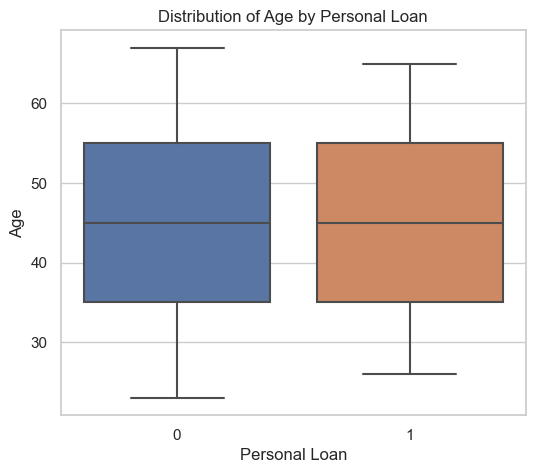

In [50]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 5))

# Create a boxplot
sns.boxplot(x='Personal Loan', y='Age', data=bank_loan)

plt.title('Distribution of Age by Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Age') 
plt.show()

###### Proved age do not have any influence on accepting the personal loan

### 3. Experience

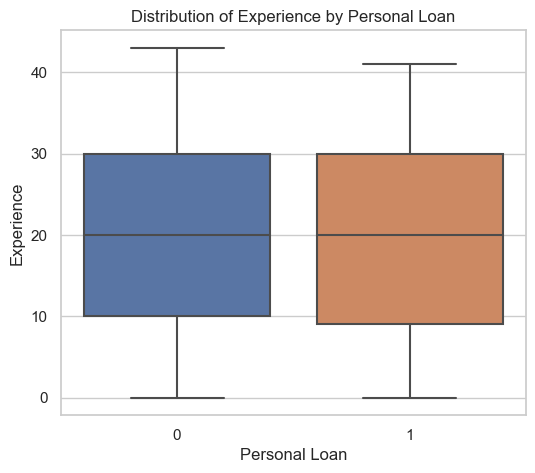

In [51]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 5))

# Create a boxplot
sns.boxplot(x='Personal Loan', y='Experience', data=bank_loan)

plt.title('Distribution of Experience by Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Experience') 
plt.show()

###### Proved experience as well have not have any influence on accepting the personal loan

### 4. Income vs. CCAvg

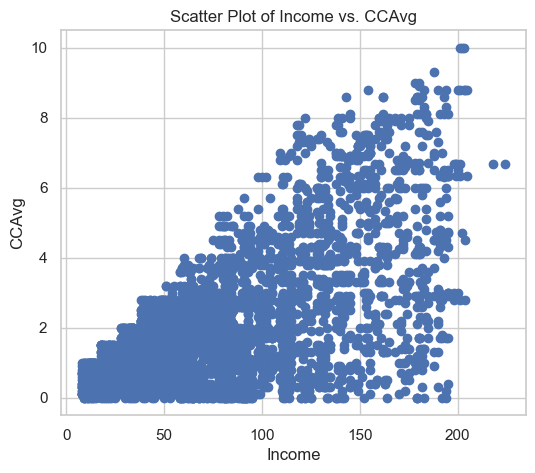

In [52]:
plt.figure(figsize=(6, 5))  # Optional: Adjusts the size of the figure

# Creating the scatter plot
plt.scatter(bank_loan['Income'], bank_loan['CCAvg'])

# Adding title and labels
plt.title('Scatter Plot of Income vs. CCAvg')
plt.xlabel('Income')
plt.ylabel('CCAvg')

# Showing the plot
plt.show()

###### With the increase of income, CCavg is also increasing

### 5. Income by Personal Loan

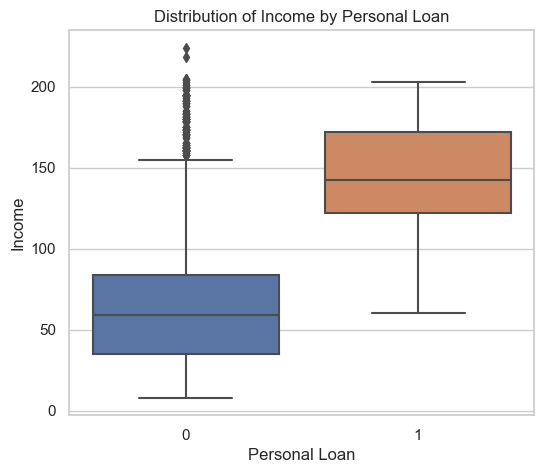

In [53]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 5))

# Create a boxplot
sns.boxplot(x='Personal Loan', y='Income', data=bank_loan)

plt.title('Distribution of Income by Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Income') 
plt.show()

###### With income more than around 55k has higher chances of acceptance the personal loan

### 6. CD Account vs Personal Loan

<Axes: xlabel='CD Account', ylabel='count'>

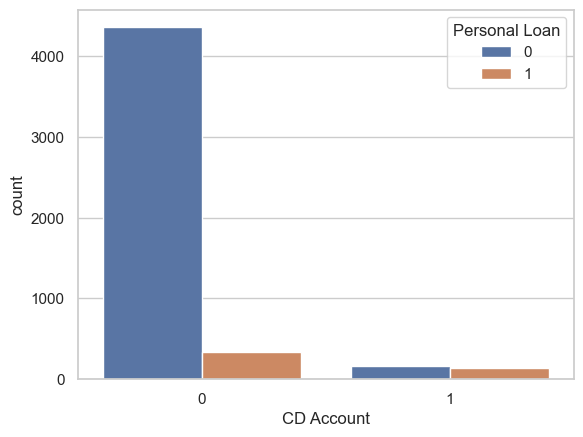

In [54]:
sns.countplot(x = 'CD Account', data = bank_loan, hue = 'Personal Loan')

###### The customer who has a CD Accounts with the bank appears to accept personal loans from the bank

### 7. CD Account vs Income

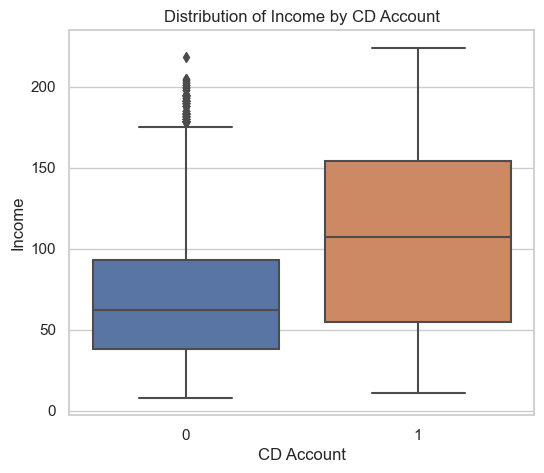

In [55]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 5))

# Create a boxplot
sns.boxplot(x='CD Account', y='Income', data=bank_loan)

plt.title('Distribution of Income by CD Account')
plt.xlabel('CD Account')
plt.ylabel('Income') 
plt.show()

###### The customers with income between 50k to 150k  has more CD acconts.

### 8. CD Account vs CCAvg

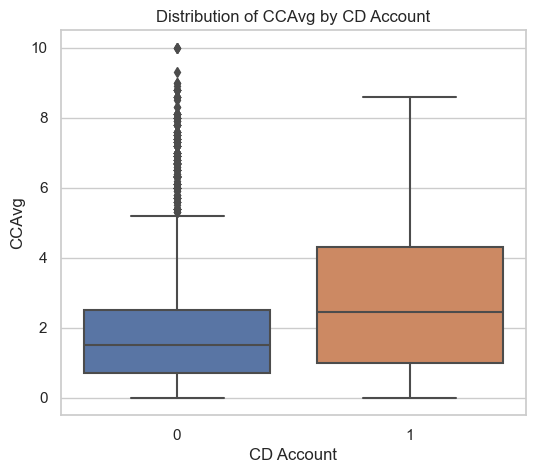

In [56]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 5))

# Create a boxplot
sns.boxplot(x='CD Account', y='CCAvg', data=bank_loan)

plt.title('Distribution of CCAvg by CD Account')
plt.xlabel('CD Account')
plt.ylabel('CCAvg') 
plt.show()

###### Customers with CCAvg with 1 and 4.5 has more CD accounts

### 9. Personal loan by Education 

<Axes: xlabel='Education', ylabel='count'>

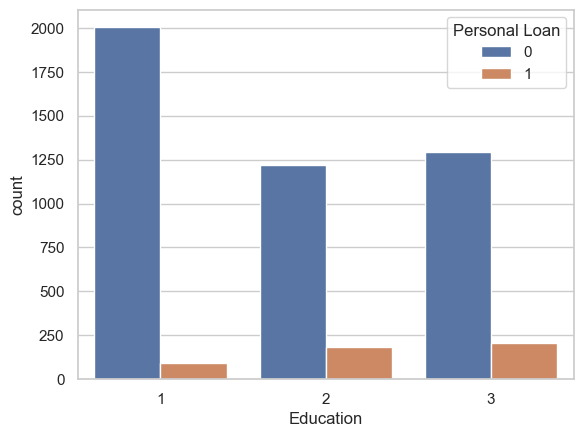

In [57]:
sns.countplot(x = 'Education', data = bank_loan, hue = 'Personal Loan')

###### Customers with advance/professional education has more chances of acceptance the personal loan

### 10. Personal by Mortgage

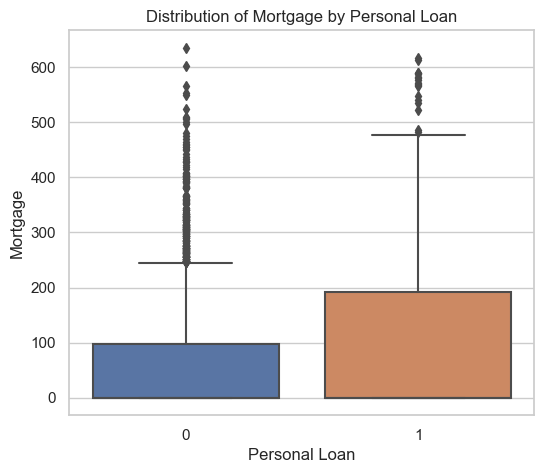

In [58]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 5))

# Create a boxplot
sns.boxplot(x='Personal Loan', y='Mortgage', data=bank_loan)

plt.title('Distribution of Mortgage by Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Mortgage') 
plt.show()

###### Customers with high mortgage are more likely to accept the personal loan

### 11. Personal by Online baking

<Axes: xlabel='Online', ylabel='count'>

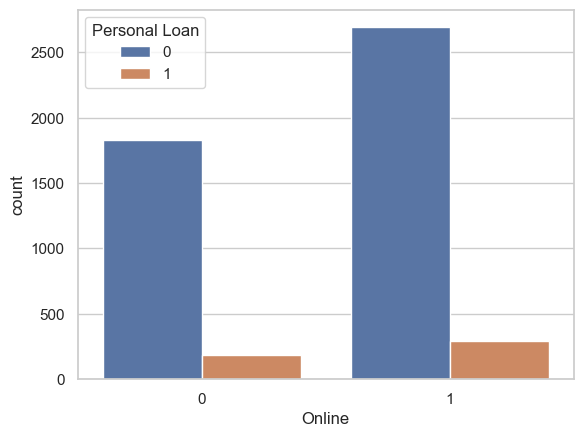

In [59]:
sns.countplot(x = 'Online', data = bank_loan, hue = 'Personal Loan')

###### More customers are using the online banking similarly the customers those are using the online banking has some chances of accepting the loan

### 12. Personal by Credit Card

<Axes: xlabel='CreditCard', ylabel='count'>

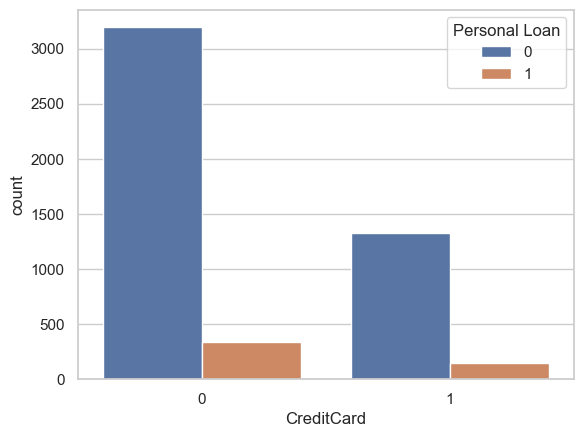

In [60]:
sns.countplot(x = 'CreditCard', data = bank_loan, hue = 'Personal Loan')

###### Credit card does not seem an enough effects on personal loan

### 13. Personal Loan by County and Region

In [61]:
bank_loan['County'].value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              350
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Kern County                 54
Marin County                54
San Luis Obispo County      33
Solano County               33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Irvine County               22
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Siskiyou

In [62]:
bank_loan['Region'].value_counts()

Southern California    2441
Bay Area               1699
Central Valley          445
Central Coast           243
North Coast              72
Sierra Nevada            48
Northern California      29
Bay Region               22
Name: Region, dtype: int64

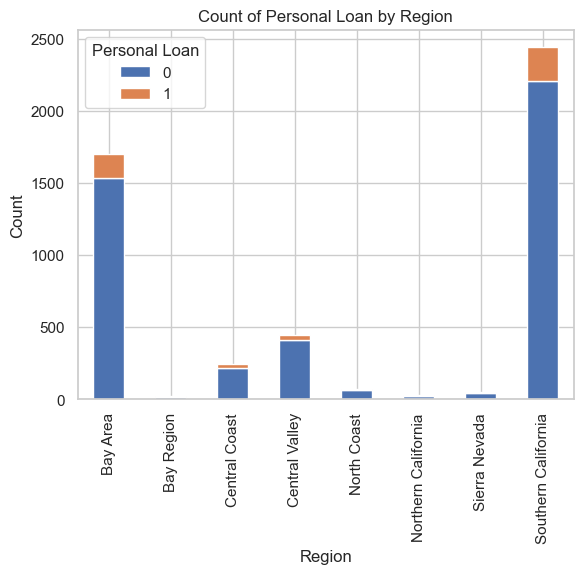

In [63]:
loan_counts = bank_loan.groupby(['Region', 'Personal Loan']).size().unstack(fill_value=0)

# Now plot the stacked bar chart
loan_counts.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Count of Personal Loan by Region')
plt.show()

###### Summary
1. Age and experience does not effects on personal loan, also these are highly correlated
2. With the increase of income CCavg also increase vice versa
3. Income more than 55k has more chances to accept the bank loan
4. Customers having CD accounts are more chances to accepts the personal loan, and those has income between 55k to 150k has more CD accounts
5. Customers with CCavg between 1 and 4 has more CD accounts
6. Customers with advance degree has more chances to accept perosnal loan
7. Customers with more house mortgage, are more likely to accept personal loan
8. Customers those uses most online banking has higher chances of accepting the loan

# 4. Feature Selection

### 1. Making the personal loan column as last colum

In [64]:
# List of all columns name except the Personal loan
columns_except_target = [i for i in bank_loan.columns if i != 'Personal Loan']

# Add the target column to the end of the list.
new_column_order = columns_except_target + ['Personal Loan']

# Reorder the DataFrame columns using the new order.
bank_loan = bank_loan[new_column_order]

### 2. Droping column

In [65]:
# As we have region so need to drop the ZIP code and County column
bank_loan.drop(columns=["ZIP Code", "County"], inplace=True)

In [66]:
bank_loan.head()

Age  Experience  Income Family  CCAvg Education  Mortgage  \
0   25           1      49      4    1.6         1         0   
1   45          19      34      3    1.5         1         0   
2   39          15      11      1    1.0         1         0   
3   35           9     100      1    2.7         2         0   
4   35           8      45      4    1.0         2         0   

  Securities Account CD Account Online CreditCard               Region  \
0                  1          0      0          0  Southern California   
1                  1          0      0          0  Southern California   
2                  0          0      0          0             Bay Area   
3                  0          0      0          0             Bay Area   
4                  0          0      0          1  Southern California   

  Personal Loan  
0             0  
1             0  
2             0  
3             0  
4             0

In [67]:
bank_loan.shape

(4999, 13)

In [68]:
#Age and experience are highly correlated we can drop one of them, so, I am droping the 

In [69]:
bank_loan.drop(columns=["Experience"], inplace=True)

# 5. Model Fitting

In [70]:
X = bank_loan.iloc[:, :-1]
y = bank_loan.iloc[:,-1]

In [71]:
oneHotCols=['Regions','Education']

one_hot_encoded_data = pd.get_dummies(X, columns = ['Region']) 
one_hot_encoded_data.head()

Age  Income Family  CCAvg Education  Mortgage Securities Account  \
0   25      49      4    1.6         1         0                  1   
1   45      34      3    1.5         1         0                  1   
2   39      11      1    1.0         1         0                  0   
3   35     100      1    2.7         2         0                  0   
4   35      45      4    1.0         2         0                  0   

  CD Account Online CreditCard  Region_Bay Area  Region_Bay Region  \
0          0      0          0                0                  0   
1          0      0          0                0                  0   
2          0      0          0                1                  0   
3          0      0          0                1                  0   
4          0      0          1                0                  0   

   Region_Central Coast  Region_Central Valley  Region_North Coast  \
0                     0                      0                   0   
1                     0                      0                   0   
2                     0                      0                   0   
3                     0                      0                   0   
4                     0                      0                   0   

   Region_Northern California  Region_Sierra Nevada  \
0                           0                     0   
1                           0                     0   
2                           0                     0   
3                           0                     0   
4                           0                     0   

   Region_Southern California  
0                           1  
1                           1  
2                           0  
3                           0  
4                           1

In [72]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Age                         4999 non-null   int64   
 1   Income                      4999 non-null   int64   
 2   Family                      4999 non-null   category
 3   CCAvg                       4999 non-null   float64 
 4   Education                   4999 non-null   category
 5   Mortgage                    4999 non-null   int64   
 6   Securities Account          4999 non-null   category
 7   CD Account                  4999 non-null   category
 8   Online                      4999 non-null   category
 9   CreditCard                  4999 non-null   category
 10  Region_Bay Area             4999 non-null   uint8   
 11  Region_Bay Region           4999 non-null   uint8   
 12  Region_Central Coast        4999 non-null   uint8   
 13  Region_Central Val

## 1. Logistic Regression

In [73]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(one_hot_encoded_data, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()

# Scale the training data and fit the scaler
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Convert the scaled training and test sets back to pandas DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [74]:
# Training a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

### 1. Testing

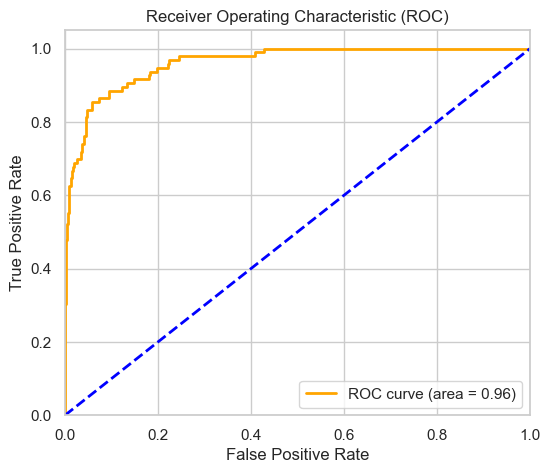

In [75]:
# Predict probabilities for the positive class
y_score = model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [76]:
y_probabilities = model.predict_proba(X_test_scaled)[:, 1]


threshold = 0.35  #

y_pred_custom_threshold = (y_probabilities >= threshold).astype(int)

In [77]:
print(confusion_matrix(y_test, y_pred_custom_threshold))
print(classification_report(y_test, y_pred_custom_threshold))

[[871  33]
 [ 27  69]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       904
           1       0.68      0.72      0.70        96

    accuracy                           0.94      1000
   macro avg       0.82      0.84      0.83      1000
weighted avg       0.94      0.94      0.94      1000



### 2. Training

In [78]:
# Predicting on the test set
y_pred = model.predict(X_train_scaled)

# Evaluating the model 
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[3569   46]
 [ 143  241]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3615
           1       0.84      0.63      0.72       384

    accuracy                           0.95      3999
   macro avg       0.90      0.81      0.85      3999
weighted avg       0.95      0.95      0.95      3999



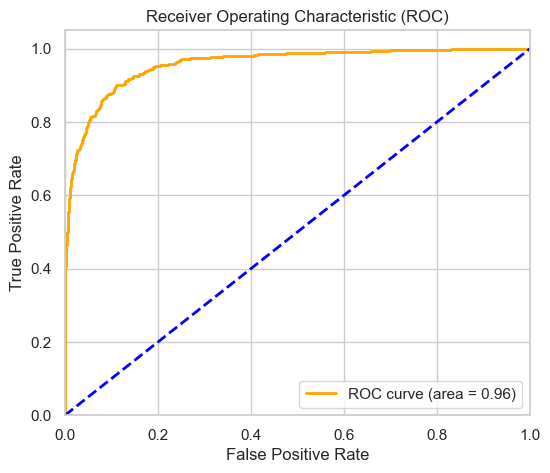

In [79]:
# Predict probabilities for the positive class
y_score = model.predict_proba(X_train_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [80]:
y_probabilities = model.predict_proba(X_train_scaled)[:, 1]


threshold = 0.35  #

y_pred_custom_threshold = (y_probabilities >= threshold).astype(int)

In [81]:
# Evaluating the model 
print(confusion_matrix(y_train, y_pred_custom_threshold))
print(classification_report(y_train, y_pred_custom_threshold))

[[3524   91]
 [ 109  275]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3615
           1       0.75      0.72      0.73       384

    accuracy                           0.95      3999
   macro avg       0.86      0.85      0.85      3999
weighted avg       0.95      0.95      0.95      3999



###### The threshold I have selected is 0.4 as we want to get the more number of acceptence the personal loan. 

### 3. Cross Validation

In [82]:
# Scale the training data and fit the scaler
one_hot_encoded_data_scaled = scaler.fit_transform(one_hot_encoded_data)

# Convert the scaled training and test sets back to pandas DataFrames
one_hot_encoded_data_scaled = pd.DataFrame(one_hot_encoded_data_scaled, columns=one_hot_encoded_data.columns, index=one_hot_encoded_data.index)

In [83]:
# Define the cross-validation procedure
cv = StratifiedKFold(n_splits=10)

# Define scoring metrics
scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)}

# Perform cross-validation
scores = cross_validate(model, one_hot_encoded_data_scaled, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=False)


print(f"Average Precision: {np.mean(scores['test_precision']):.2f}")
print(f"Average Recall: {np.mean(scores['test_recall']):.2f}")
print(f"Average F1 Score: {np.mean(scores['test_f1_score']):.2f}")

Average Precision: 0.81
Average Recall: 0.63
Average F1 Score: 0.71


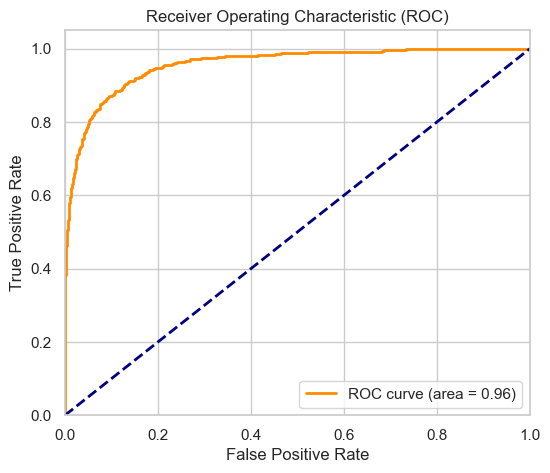

In [84]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the cross-validation procedure
cv = StratifiedKFold(n_splits=10)

# Get predicted probabilities using cross-validation, this time with cross_val_predict
y_prob = cross_val_predict(model, one_hot_encoded_data_scaled, y, cv=cv, method='predict_proba', n_jobs=-1)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y, y_prob[:, 1])  # y_prob[:, 1] are the probabilities for class 1
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

###### The threshold I have selected is 0.35 as we want to get the more number of acceptence the personal loan. 

### 1. Random Forest for Feature Selection

In [85]:
X_train, X_test, y_train, y_test = train_test_split(one_hot_encoded_data, y, test_size=0.2, random_state=42)

In [86]:
scaler = StandardScaler()

# Scale the training data and fit the scaler
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Convert the scaled training and test sets back to pandas DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [87]:
rf = RandomForestClassifier(n_estimators=100, bootstrap=True)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [88]:
feature_importances = rf.feature_importances_

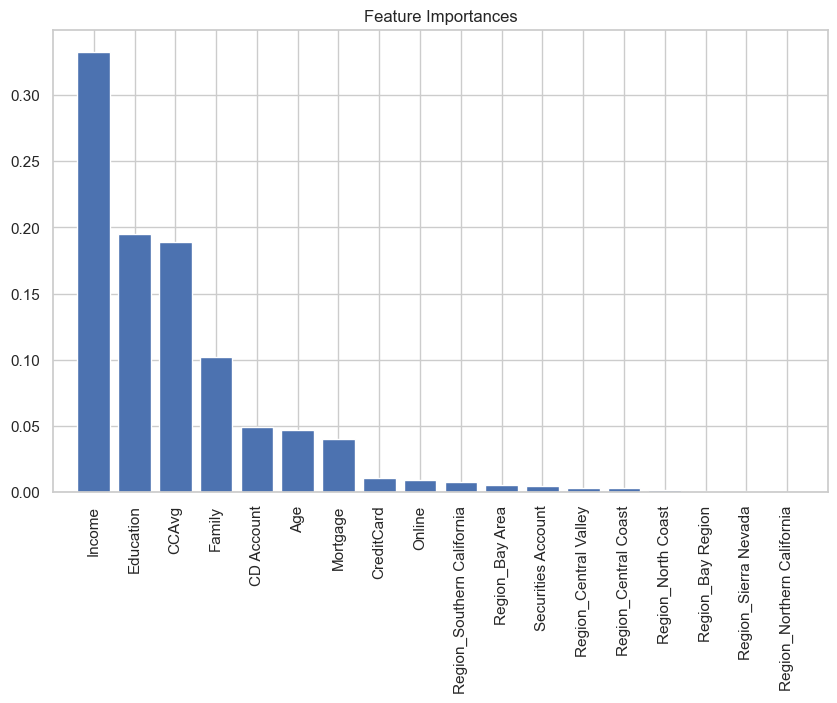

In [89]:
# Assuming your features are in a DataFrame `df`:
features = X_train.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

#### 1. Droping the all Regions Featurs

In [90]:
one_hot_encoded_data_scaled.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Region_Bay Area', 'Region_Bay Region', 'Region_Central Coast',
       'Region_Central Valley', 'Region_North Coast',
       'Region_Northern California', 'Region_Sierra Nevada',
       'Region_Southern California'],
      dtype='object')

In [91]:
one_hot_encoded_data_scaled.drop(columns=["Region_Bay Area","Region_Bay Region","Region_Central Coast","Region_Central Valley","Region_North Coast","Region_Northern California","Region_Sierra Nevada", "Region_Southern California"], inplace=True)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(one_hot_encoded_data_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [93]:
# Training a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

##### Cross-Validation

In [94]:
# Define the cross-validation procedure
cv = StratifiedKFold(n_splits=10)

# Define scoring metrics
scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)}

# Perform cross-validation
scores = cross_validate(model, one_hot_encoded_data_scaled, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=False)


print(f"Average Precision: {np.mean(scores['test_precision']):.2f}")
print(f"Average Recall: {np.mean(scores['test_recall']):.2f}")
print(f"Average F1 Score: {np.mean(scores['test_f1_score']):.2f}")

Average Precision: 0.82
Average Recall: 0.63
Average F1 Score: 0.71


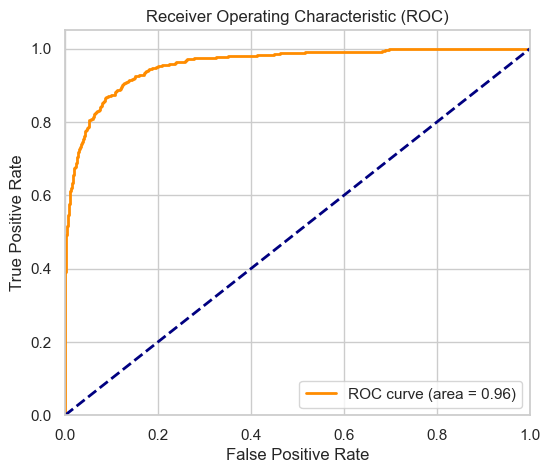

In [95]:
# Define the cross-validation procedure
cv = StratifiedKFold(n_splits=10)

# Get predicted probabilities using cross-validation, this time with cross_val_predict
y_prob = cross_val_predict(model, one_hot_encoded_data_scaled, y, cv=cv, method='predict_proba', n_jobs=-1)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y, y_prob[:, 1])  # y_prob[:, 1] are the probabilities for class 1
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#### 2. Droping the Online and Credit Card Features

In [96]:
one_hot_encoded_data_scaled.drop(columns=["Online","CreditCard"], inplace=True)

In [97]:
one_hot_encoded_data_scaled.head()

Age    Income    Family     CCAvg  Education  Mortgage  \
0 -1.774184 -0.538475  1.397827 -0.193531  -1.048893 -0.555597   
1 -0.029423 -0.864366  0.526321 -0.250753  -1.048893 -0.555597   
2 -0.552851 -1.364065 -1.216692 -0.536867  -1.048893 -0.555597   
3 -0.901803  0.569554 -1.216692  0.435920   0.141980 -0.555597   
4 -0.901803 -0.625379  1.397827 -0.536867   0.141980 -0.555597   

   Securities Account  CD Account  
0            2.928588   -0.253567  
1            2.928588   -0.253567  
2           -0.341461   -0.253567  
3           -0.341461   -0.253567  
4           -0.341461   -0.253567

In [98]:
X_train, X_test, y_train, y_test = train_test_split(one_hot_encoded_data_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [99]:
# Training a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

##### Cross-Validation

In [100]:
# Define the cross-validation procedure
cv = StratifiedKFold(n_splits=10)

# Define scoring metrics
scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)}

# Perform cross-validation
scores = cross_validate(model, one_hot_encoded_data_scaled, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=False)


print(f"Average Precision: {np.mean(scores['test_precision']):.2f}")
print(f"Average Recall: {np.mean(scores['test_recall']):.2f}")
print(f"Average F1 Score: {np.mean(scores['test_f1_score']):.2f}")

Average Precision: 0.79
Average Recall: 0.60
Average F1 Score: 0.68


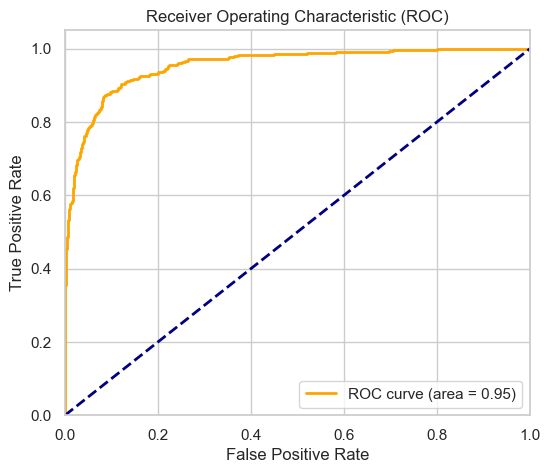

In [101]:
# Define the cross-validation procedure
cv = StratifiedKFold(n_splits=10)

# Get predicted probabilities using cross-validation, this time with cross_val_predict
y_prob = cross_val_predict(model, one_hot_encoded_data_scaled, y, cv=cv, method='predict_proba', n_jobs=-1)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y, y_prob[:, 1])  # y_prob[:, 1] are the probabilities for class 1
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

##### Train

In [102]:
# Predicting on the test set
y_pred = model.predict(X_train)

# Evaluating the model 
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[3559   56]
 [ 158  226]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3615
           1       0.80      0.59      0.68       384

    accuracy                           0.95      3999
   macro avg       0.88      0.79      0.82      3999
weighted avg       0.94      0.95      0.94      3999



In [103]:
y_probabilities = model.predict_proba(X_train)[:, 1]


threshold = 0.2  #

y_pred_custom_threshold = (y_probabilities >= threshold).astype(int)

In [104]:
print(confusion_matrix(y_train, y_pred_custom_threshold))
print(classification_report(y_train, y_pred_custom_threshold))

[[3395  220]
 [  77  307]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      3615
           1       0.58      0.80      0.67       384

    accuracy                           0.93      3999
   macro avg       0.78      0.87      0.82      3999
weighted avg       0.94      0.93      0.93      3999



##### Test

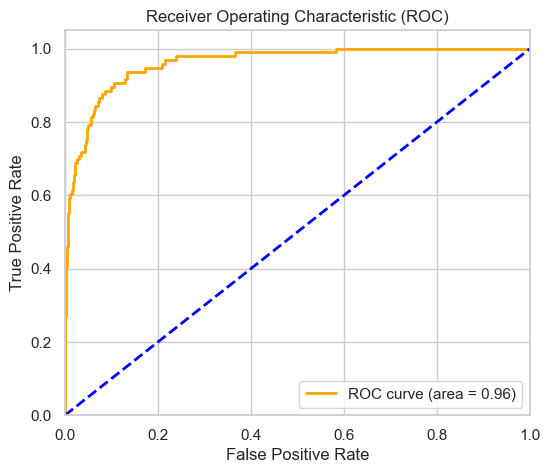

In [105]:
# Predict probabilities for the positive class
y_score = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [106]:
y_probabilities = model.predict_proba(X_test)[:, 1]


threshold = 0.2  #

y_pred_custom_threshold = (y_probabilities >= threshold).astype(int)

In [107]:
print(confusion_matrix(y_test, y_pred_custom_threshold))
print(classification_report(y_test, y_pred_custom_threshold))

[[850  54]
 [ 18  78]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       904
           1       0.59      0.81      0.68        96

    accuracy                           0.93      1000
   macro avg       0.79      0.88      0.82      1000
weighted avg       0.94      0.93      0.93      1000



#### 3. Droping the Mortgage feature

In [108]:
one_hot_encoded_data_scaled.drop(columns=["Mortgage"], inplace=True)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(one_hot_encoded_data_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [110]:
# Training a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

##### Cross-Validation

In [111]:
# Define the cross-validation procedure
cv = StratifiedKFold(n_splits=10)

# Define scoring metrics
scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)}

# Perform cross-validation
scores = cross_validate(model, one_hot_encoded_data_scaled, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=False)


print(f"Average Precision: {np.mean(scores['test_precision']):.2f}")
print(f"Average Recall: {np.mean(scores['test_recall']):.2f}")
print(f"Average F1 Score: {np.mean(scores['test_f1_score']):.2f}")

Average Precision: 0.79
Average Recall: 0.60
Average F1 Score: 0.68


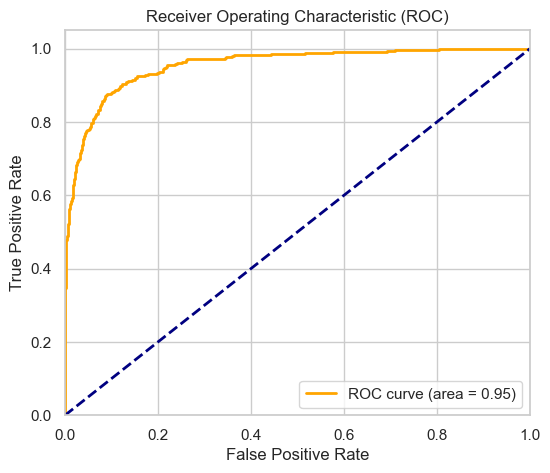

In [112]:
# Define the cross-validation procedure
cv = StratifiedKFold(n_splits=10)

# Get predicted probabilities using cross-validation, this time with cross_val_predict
y_prob = cross_val_predict(model, one_hot_encoded_data_scaled, y, cv=cv, method='predict_proba', n_jobs=-1)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y, y_prob[:, 1])  # y_prob[:, 1] are the probabilities for class 1
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

##### Test

In [113]:
# Predicting on the test set
y_pred = model.predict(X_train)

# Evaluating the model 
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[3559   56]
 [ 156  228]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3615
           1       0.80      0.59      0.68       384

    accuracy                           0.95      3999
   macro avg       0.88      0.79      0.83      3999
weighted avg       0.94      0.95      0.94      3999



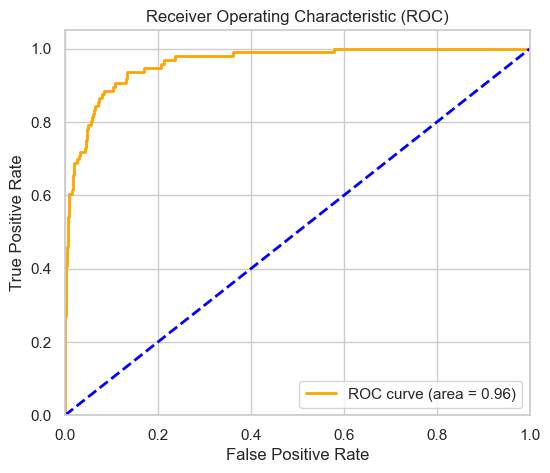

In [114]:
# Predict probabilities for the positive class
y_score = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [115]:
y_probabilities = model.predict_proba(X_test)[:, 1]


threshold = 0.2  #

y_pred_custom_threshold = (y_probabilities >= threshold).astype(int)

In [116]:
print(confusion_matrix(y_test, y_pred_custom_threshold))
print(classification_report(y_test, y_pred_custom_threshold))

[[850  54]
 [ 18  78]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       904
           1       0.59      0.81      0.68        96

    accuracy                           0.93      1000
   macro avg       0.79      0.88      0.82      1000
weighted avg       0.94      0.93      0.93      1000



##### Train

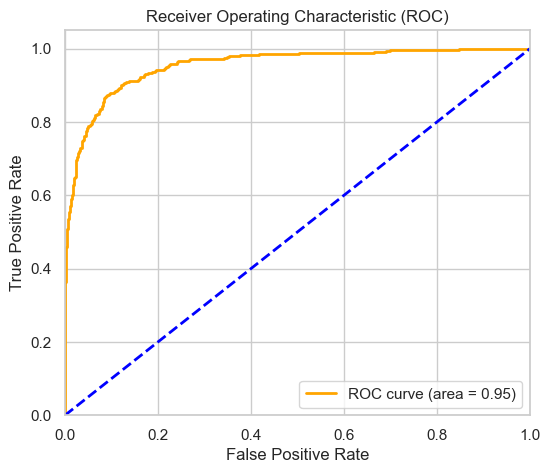

In [117]:
# Predict probabilities for the positive class
y_score = model.predict_proba(X_train)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [118]:
y_probabilities = model.predict_proba(X_train)[:, 1]


threshold = 0.2  #

y_pred_custom_threshold = (y_probabilities >= threshold).astype(int)

In [119]:
print(confusion_matrix(y_train, y_pred_custom_threshold))
print(classification_report(y_train, y_pred_custom_threshold))

[[3400  215]
 [  75  309]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      3615
           1       0.59      0.80      0.68       384

    accuracy                           0.93      3999
   macro avg       0.78      0.87      0.82      3999
weighted avg       0.94      0.93      0.93      3999



In [151]:
y_probabilities = model.predict_proba(X_train)[:, 1]


threshold = 0.03  #

y_pred_custom_threshold = (y_probabilities >= threshold).astype(int)

In [152]:
print(confusion_matrix(y_train, y_pred_custom_threshold))
print(classification_report(y_train, y_pred_custom_threshold))

[[2699  916]
 [  13  371]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.85      3615
           1       0.29      0.97      0.44       384

    accuracy                           0.77      3999
   macro avg       0.64      0.86      0.65      3999
weighted avg       0.93      0.77      0.81      3999



In [155]:
y_probabilities = model.predict_proba(X_test)[:, 1]


threshold = 0.03  #

y_pred_custom_threshold = (y_probabilities >= threshold).astype(int)

In [156]:
print(confusion_matrix(y_test, y_pred_custom_threshold))
print(classification_report(y_test, y_pred_custom_threshold))

[[686 218]
 [  2  94]]
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       904
           1       0.30      0.98      0.46        96

    accuracy                           0.78      1000
   macro avg       0.65      0.87      0.66      1000
weighted avg       0.93      0.78      0.82      1000



##### Testing while balancing the class

In [122]:
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [123]:
# y_probabilities = model.predict_proba(X_train_smote)[:, 1]

# 
# threshold = 0.2  #

# y_pred_custom_threshold = (y_probabilities >= threshold).astype(int)

In [124]:
# print(confusion_matrix(y_train_smote, y_pred_custom_threshold))
# print(classification_report(y_train_smote, y_pred_custom_threshold))

In [125]:
# # Training a logistic regression model
# model = LogisticRegression()
# model.fit(X_train, y_train)

In [126]:
# # Define the cross-validation procedure
# cv = StratifiedKFold(n_splits=10)

# # Define scoring metrics
# scoring = {'precision': make_scorer(precision_score),
#            'recall': make_scorer(recall_score),
#            'f1_score': make_scorer(f1_score)}

# # Perform cross-validation
# scores = cross_validate(model, X_train_smote, y_train_smote, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=False)


# print(f"Average Precision: {np.mean(scores['test_precision']):.2f}")
# print(f"Average Recall: {np.mean(scores['test_recall']):.2f}")
# print(f"Average F1 Score: {np.mean(scores['test_f1_score']):.2f}")

In [127]:
# # Define the cross-validation procedure
# cv = StratifiedKFold(n_splits=10)

# # Get predicted probabilities using cross-validation, this time with cross_val_predict
# y_prob = cross_val_predict(model, one_hot_encoded_data_scaled, y, cv=cv, method='predict_proba', n_jobs=-1)

# # Compute ROC curve and ROC area for each class
# fpr, tpr, _ = roc_curve(y, y_prob[:, 1])  # y_prob[:, 1] are the probabilities for class 1
# roc_auc = auc(fpr, tpr)

# # Plot the ROC curve
# plt.figure(figsize=(6, 5))
# plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC)')
# plt.legend(loc="lower right")
# plt.show()

In [128]:
# # Predicting on the test set
# y_pred = model.predict(X_train_smote)

# # Evaluating the model 
# print(confusion_matrix(y_train_smote, y_pred))
# print(classification_report(y_train_smote, y_pred))

In [129]:
# # Predict probabilities for the positive class
# y_score = model.predict_proba(X_train_smote)[:, 1]

# # Compute ROC curve and ROC area
# fpr, tpr, thresholds = roc_curve(y_train_smote, y_score)
# roc_auc = auc(fpr, tpr)

# # Plot the ROC curve
# plt.figure(figsize=(6, 5))
# plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC)')
# plt.legend(loc="lower right")
# plt.show()

In [130]:
# y_probabilities = model.predict_proba(X_train_smote)[:, 1]


# threshold = 0.2  #

# y_pred_custom_threshold = (y_probabilities >= threshold).astype(int)

In [131]:
# print(confusion_matrix(y_train_smote, y_pred_custom_threshold))
# print(classification_report(y_train_smote, y_pred_custom_threshold))